# Final Project Template

For your final project, you are required to create an object detection and classification pipeline using the provided datasets. You will train a classification model using the included images and then apply this model for inference on the provided still image.

Here are the detailed steps for your project:

1) Begin by implementing one of the classic object detection techniques we have covered, such as HSV tracking, blob detection, edge detection. You can choose to employ one technique or combine multiple ones. The goal is to create bounding boxes around objects within the scene. To facilitate the classification step, ensure that all bounding boxes are in the form of rectangles.&nbsp;

2) Utilize the provided images to train a Convolutional Neural Network (CNN) model for the classification of the objects within the bounding boxes. You can use Google Colab to train larger models that require a GPU. We will discuss the specifics of this process in class.&nbsp;

3) Finally, render the final still image with bounding boxes and text that display the classification label of the object contained within each box.

We will build and discuss small examples of each step in this project to help you successfully complete it.

Submit a notebook with your all your model training and object detection steps.&nbsp; Also include your model in ".keras" or ".tf" format.

The datasets (choose one, you don't have to do both!):

1) Car/Truck/Airplane

2) Dog/Bird/Deer



Notes:

1) You are creating a small model which can classify small images.&nbsp; &nbsp;Follow the basic structure and format we discussed in class.&nbsp;

2) Your models will not be perfect, averaging around 75% accuracy,&nbsp; and mislabeling will happen.&nbsp; Concentrate on your object detection pipeline to create bounding boxes and then passing the image data to your model for classification.&nbsp;

3) Make sure your bounding boxes are sized correctly for your model.

4) If you normalize your image data (0-1) then you need to normalize the images from your bounding boxes before you pass them to your model.

5) Your models will be trained with labels as integer values and will need to be mapped to your class names.&nbsp; "Deer", "Dog" ... etc.&nbsp;&nbsp;

In [137]:

import tensorflow as tf

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



Num GPUs Available:  1


## Model Training

In [138]:
# Code for your model goes here
# i manually unzipped files into train folder

#import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [139]:
# Load the images from the directory
def load_images_from_folder(train):
    images = []
    for filename in os.listdir(train):
        img = cv2.imread(os.path.join(train, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            images.append(img)
    return images

# The folder paths your images are located in.  You will change these for your directories.
folder_paths = ['train/dog', 'train/bird', 'train/deer']


# The class names/labels of your images.
class_labels = {'dog': 0, 'bird': 1, 'deer': 2}

# The lists to store your images and labels in.
x_train = []
y_train = []

# Load the images and labels into the lists.
for folder_path in folder_paths:
    class_name = os.path.basename(folder_path)
    class_id = class_labels[class_name]
    images = load_images_from_folder(folder_path)

    # Extend the lists to add the images and labels from the loaded folder.
    x_train.extend(images)
    y_train.extend([class_id] * len(images))

# Convert the loaded lists into numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [140]:
# Print the shape of the training data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Print the first 10 labels
print(f"Sample labels: {y_train[:10]}")

x_train shape: (15000, 64, 64, 3)
y_train shape: (15000,)
Sample labels: [0 0 0 0 0 0 0 0 0 0]


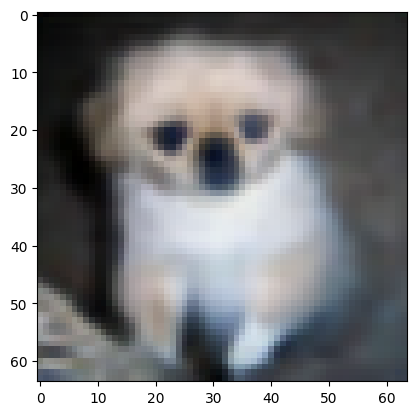

In [141]:
plt.imshow(x_train[0])

In [142]:
# Check the corresponding label for the image above. Change the index to view different labels.
#prints out 0 which means dog. we're good.
print(y_train[0])

0


In [143]:
print(x_train[0])

[[[  7   4   3]
  [  2   2   4]
  [  8   6   7]
  ...
  [ 38  37  38]
  [ 32  36  35]
  [ 30  38  34]]

 [[  3   8   9]
  [ 10  11   9]
  [ 12  14   9]
  ...
  [ 39  41  40]
  [ 35  36  36]
  [ 34  33  33]]

 [[  4   7   5]
  [  9  10   9]
  [  7  10   9]
  ...
  [ 40  41  41]
  [ 38  40  40]
  [ 37  37  38]]

 ...

 [[136 140 141]
  [144 149 150]
  [152 155 155]
  ...
  [ 63  69  77]
  [ 60  68  77]
  [ 59  66  74]]

 [[ 84  91 106]
  [ 79  89 108]
  [ 86  96 116]
  ...
  [ 60  67  77]
  [ 54  63  78]
  [ 55  64  75]]

 [[ 77  88 108]
  [ 70  81 102]
  [ 76  86 105]
  ...
  [ 61  68  78]
  [ 56  64  75]
  [ 57  64  77]]]


In [144]:
x_train = x_train.astype('float32') / 255.0

In [145]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device: /device:GPU:0


2023-12-10 11:49:43.099265: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 11:49:43.099478: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 11:49:43.099636: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [146]:
# Let's build out model.

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# import to_categorical from tensorflow
from tensorflow.keras.utils import to_categorical
# save each epoch of the model
from keras.callbacks import ModelCheckpoint

# Define the checkpoint callback
checkpoint_path = "best_model.tf"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

# Define the VGG16 architecture
model = keras.Sequential([

    # Normalize the images to pixel values (0, 1)
    # keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32,32,3)),

    # Add data augmentation here
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(64,64,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),

    # Block 1
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 4
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Block 5
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    # Fully connected layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.3),
    Dense(2048, activation='relu'),
    Dense(3, activation='softmax')
])

# Fine tune the sgd optimizer
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/100
94/94 [==============================] - ETA: 0s - loss: 1.0371 - accuracy: 0.4182
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 29s 207ms/step - loss: 1.0371 - accuracy: 0.4182 - val_loss: 1.8902 - val_accuracy: 0.0000e+00
Epoch 2/100
94/94 [==============================] - ETA: 0s - loss: 1.0245 - accuracy: 0.4595
Epoch 2: val_accuracy did not improve from 0.00000
94/94 [==============================] - 10s 109ms/step - loss: 1.0245 - accuracy: 0.4595 - val_loss: 1.8563 - val_accuracy: 0.0000e+00
Epoch 3/100
94/94 [==============================] - ETA: 0s - loss: 0.9831 - accuracy: 0.5182
Epoch 3: val_accuracy did not improve from 0.00000
94/94 [==============================] - 10s 109ms/step - loss: 0.9831 - accuracy: 0.5182 - val_loss: 1.7650 - val_accuracy: 0.0000e+00
Epoch 4/100
94/94 [==============================] - ETA: 0s - loss: 0.9444 - accuracy: 0.5522
Epoch 4: val_accuracy did not improve from 0.00000
94/94 [==============================] - 10s 109ms/step - loss: 0.9444 - accuracy: 0.5522 - val_loss: 2.0244 - val_accuracy: 0.0000e+00
Epoch 5/100
94/94 

INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 135ms/step - loss: 0.8791 - accuracy: 0.5861 - val_loss: 1.6434 - val_accuracy: 0.0197
Epoch 9/100
94/94 [==============================] - ETA: 0s - loss: 0.8564 - accuracy: 0.6008
Epoch 9: val_accuracy did not improve from 0.01967
94/94 [==============================] - 11s 112ms/step - loss: 0.8564 - accuracy: 0.6008 - val_loss: 1.9848 - val_accuracy: 0.0193
Epoch 10/100
94/94 [==============================] - ETA: 0s - loss: 0.8487 - accuracy: 0.6088
Epoch 10: val_accuracy improved from 0.01967 to 0.09900, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 12s 133ms/step - loss: 0.8487 - accuracy: 0.6088 - val_loss: 1.3284 - val_accuracy: 0.0990
Epoch 11/100
94/94 [==============================] - ETA: 0s - loss: 0.8285 - accuracy: 0.6181
Epoch 11: val_accuracy improved from 0.09900 to 0.11333, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 12s 131ms/step - loss: 0.8285 - accuracy: 0.6181 - val_loss: 1.4206 - val_accuracy: 0.1133
Epoch 12/100
94/94 [==============================] - ETA: 0s - loss: 0.8114 - accuracy: 0.6301
Epoch 12: val_accuracy improved from 0.11333 to 0.23933, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 135ms/step - loss: 0.8114 - accuracy: 0.6301 - val_loss: 1.2961 - val_accuracy: 0.2393
Epoch 13/100
94/94 [==============================] - ETA: 0s - loss: 0.8002 - accuracy: 0.6364
Epoch 13: val_accuracy did not improve from 0.23933
94/94 [==============================] - 10s 111ms/step - loss: 0.8002 - accuracy: 0.6364 - val_loss: 1.4722 - val_accuracy: 0.1530
Epoch 14/100
94/94 [==============================] - ETA: 0s - loss: 0.7935 - accuracy: 0.6419
Epoch 14: val_accuracy did not improve from 0.23933
94/94 [==============================] - 11s 113ms/step - loss: 0.7935 - accuracy: 0.6419 - val_loss: 1.6854 - val_accuracy: 0.1223
Epoch 15/100
94/94 [==============================] - ETA: 0s - loss: 0.7688 - accuracy: 0.6633
Epoch 15: val_accuracy did not improve from 0.23933
94/94 [==============================] - 10s 110ms/step - loss: 0.7688 - accuracy: 0.6633 - val_loss: 1.4555 - val_accuracy: 0.2050
Epoch 16/100
94/94 [========

INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 134ms/step - loss: 0.7002 - accuracy: 0.6980 - val_loss: 1.4556 - val_accuracy: 0.2837
Epoch 19/100
94/94 [==============================] - ETA: 0s - loss: 0.6958 - accuracy: 0.7036
Epoch 19: val_accuracy improved from 0.28367 to 0.44733, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 136ms/step - loss: 0.6958 - accuracy: 0.7036 - val_loss: 1.0775 - val_accuracy: 0.4473
Epoch 20/100
94/94 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.7098
Epoch 20: val_accuracy improved from 0.44733 to 0.52133, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 12s 131ms/step - loss: 0.6819 - accuracy: 0.7098 - val_loss: 1.0279 - val_accuracy: 0.5213
Epoch 21/100
94/94 [==============================] - ETA: 0s - loss: 0.6570 - accuracy: 0.7207
Epoch 21: val_accuracy did not improve from 0.52133
94/94 [==============================] - 10s 109ms/step - loss: 0.6570 - accuracy: 0.7207 - val_loss: 1.0725 - val_accuracy: 0.4537
Epoch 22/100
94/94 [==============================] - ETA: 0s - loss: 0.6425 - accuracy: 0.7276
Epoch 22: val_accuracy did not improve from 0.52133
94/94 [==============================] - 10s 110ms/step - loss: 0.6425 - accuracy: 0.7276 - val_loss: 0.9815 - val_accuracy: 0.5030
Epoch 23/100
94/94 [==============================] - ETA: 0s - loss: 0.6227 - accuracy: 0.7387
Epoch 23: val_accuracy did not improve from 0.52133
94/94 [==============================] - 11s 113ms/step - loss: 0.6227 - accuracy: 0.7387 - val_loss: 1.0929 - val_accuracy: 0.4753
Epoch 24/100
94/94 [========

INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 138ms/step - loss: 0.5607 - accuracy: 0.7649 - val_loss: 0.9627 - val_accuracy: 0.5777
Epoch 28/100
94/94 [==============================] - ETA: 0s - loss: 0.5373 - accuracy: 0.7796
Epoch 28: val_accuracy did not improve from 0.57767
94/94 [==============================] - 11s 114ms/step - loss: 0.5373 - accuracy: 0.7796 - val_loss: 1.0127 - val_accuracy: 0.5710
Epoch 29/100
94/94 [==============================] - ETA: 0s - loss: 0.5344 - accuracy: 0.7838
Epoch 29: val_accuracy improved from 0.57767 to 0.67167, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 134ms/step - loss: 0.5344 - accuracy: 0.7838 - val_loss: 0.7996 - val_accuracy: 0.6717
Epoch 30/100
94/94 [==============================] - ETA: 0s - loss: 0.5246 - accuracy: 0.7869
Epoch 30: val_accuracy did not improve from 0.67167
94/94 [==============================] - 11s 113ms/step - loss: 0.5246 - accuracy: 0.7869 - val_loss: 0.9061 - val_accuracy: 0.6207
Epoch 31/100
94/94 [==============================] - ETA: 0s - loss: 0.5077 - accuracy: 0.7958
Epoch 31: val_accuracy did not improve from 0.67167
94/94 [==============================] - 10s 108ms/step - loss: 0.5077 - accuracy: 0.7958 - val_loss: 1.0326 - val_accuracy: 0.5873
Epoch 32/100
94/94 [==============================] - ETA: 0s - loss: 0.4734 - accuracy: 0.8090
Epoch 32: val_accuracy did not improve from 0.67167
94/94 [==============================] - 11s 113ms/step - loss: 0.4734 - accuracy: 0.8090 - val_loss: 0.9970 - val_accuracy: 0.5830
Epoch 33/100
94/94 [========

INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 134ms/step - loss: 0.4119 - accuracy: 0.8393 - val_loss: 0.7780 - val_accuracy: 0.6957
Epoch 38/100
94/94 [==============================] - ETA: 0s - loss: 0.4025 - accuracy: 0.8387
Epoch 38: val_accuracy did not improve from 0.69567
94/94 [==============================] - 10s 109ms/step - loss: 0.4025 - accuracy: 0.8387 - val_loss: 0.7928 - val_accuracy: 0.6840
Epoch 39/100
94/94 [==============================] - ETA: 0s - loss: 0.4025 - accuracy: 0.8414
Epoch 39: val_accuracy improved from 0.69567 to 0.71367, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 138ms/step - loss: 0.4025 - accuracy: 0.8414 - val_loss: 0.7119 - val_accuracy: 0.7137
Epoch 40/100
94/94 [==============================] - ETA: 0s - loss: 0.3745 - accuracy: 0.8508
Epoch 40: val_accuracy did not improve from 0.71367
94/94 [==============================] - 11s 112ms/step - loss: 0.3745 - accuracy: 0.8508 - val_loss: 1.1796 - val_accuracy: 0.5850
Epoch 41/100
94/94 [==============================] - ETA: 0s - loss: 0.3668 - accuracy: 0.8589
Epoch 41: val_accuracy did not improve from 0.71367
94/94 [==============================] - 10s 109ms/step - loss: 0.3668 - accuracy: 0.8589 - val_loss: 0.8380 - val_accuracy: 0.6647
Epoch 42/100
94/94 [==============================] - ETA: 0s - loss: 0.3630 - accuracy: 0.8624
Epoch 42: val_accuracy did not improve from 0.71367
94/94 [==============================] - 10s 109ms/step - loss: 0.3630 - accuracy: 0.8624 - val_loss: 1.0834 - val_accuracy: 0.6127
Epoch 43/100
94/94 [========

INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 133ms/step - loss: 0.3110 - accuracy: 0.8824 - val_loss: 0.6817 - val_accuracy: 0.7483
Epoch 47/100
94/94 [==============================] - ETA: 0s - loss: 0.2931 - accuracy: 0.8873
Epoch 47: val_accuracy did not improve from 0.74833
94/94 [==============================] - 10s 110ms/step - loss: 0.2931 - accuracy: 0.8873 - val_loss: 0.8390 - val_accuracy: 0.7030
Epoch 48/100
94/94 [==============================] - ETA: 0s - loss: 0.2903 - accuracy: 0.8907
Epoch 48: val_accuracy did not improve from 0.74833
94/94 [==============================] - 10s 111ms/step - loss: 0.2903 - accuracy: 0.8907 - val_loss: 0.7655 - val_accuracy: 0.7167
Epoch 49/100
94/94 [==============================] - ETA: 0s - loss: 0.2690 - accuracy: 0.8999
Epoch 49: val_accuracy improved from 0.74833 to 0.77567, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 12s 132ms/step - loss: 0.2690 - accuracy: 0.8999 - val_loss: 0.6498 - val_accuracy: 0.7757
Epoch 50/100
94/94 [==============================] - ETA: 0s - loss: 0.2600 - accuracy: 0.9046
Epoch 50: val_accuracy did not improve from 0.77567
94/94 [==============================] - 10s 110ms/step - loss: 0.2600 - accuracy: 0.9046 - val_loss: 0.7695 - val_accuracy: 0.7373
Epoch 51/100
94/94 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.9036
Epoch 51: val_accuracy did not improve from 0.77567
94/94 [==============================] - 10s 111ms/step - loss: 0.2573 - accuracy: 0.9036 - val_loss: 0.8085 - val_accuracy: 0.7123
Epoch 52/100
94/94 [==============================] - ETA: 0s - loss: 0.2384 - accuracy: 0.9115
Epoch 52: val_accuracy did not improve from 0.77567
94/94 [==============================] - 11s 112ms/step - loss: 0.2384 - accuracy: 0.9115 - val_loss: 0.7736 - val_accuracy: 0.7140
Epoch 53/100
94/94 [========

INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 12s 133ms/step - loss: 0.2273 - accuracy: 0.9152 - val_loss: 0.5642 - val_accuracy: 0.7980
Epoch 55/100
94/94 [==============================] - ETA: 0s - loss: 0.2271 - accuracy: 0.9172
Epoch 55: val_accuracy did not improve from 0.79800
94/94 [==============================] - 10s 109ms/step - loss: 0.2271 - accuracy: 0.9172 - val_loss: 0.8802 - val_accuracy: 0.7130
Epoch 56/100
94/94 [==============================] - ETA: 0s - loss: 0.2035 - accuracy: 0.9248
Epoch 56: val_accuracy did not improve from 0.79800
94/94 [==============================] - 10s 109ms/step - loss: 0.2035 - accuracy: 0.9248 - val_loss: 1.0061 - val_accuracy: 0.6473
Epoch 57/100
94/94 [==============================] - ETA: 0s - loss: 0.2198 - accuracy: 0.9172
Epoch 57: val_accuracy did not improve from 0.79800
94/94 [==============================] - 10s 110ms/step - loss: 0.2198 - accuracy: 0.9172 - val_loss: 0.8124 - val_accuracy: 0.7317
Epoch 58/100
94/94 [========

INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 13s 138ms/step - loss: 0.1679 - accuracy: 0.9391 - val_loss: 0.6002 - val_accuracy: 0.8013
Epoch 62/100
94/94 [==============================] - ETA: 0s - loss: 0.1627 - accuracy: 0.9395
Epoch 62: val_accuracy did not improve from 0.80133
94/94 [==============================] - 11s 113ms/step - loss: 0.1627 - accuracy: 0.9395 - val_loss: 1.0287 - val_accuracy: 0.7073
Epoch 63/100
94/94 [==============================] - ETA: 0s - loss: 0.1681 - accuracy: 0.9376
Epoch 63: val_accuracy improved from 0.80133 to 0.85267, saving model to best_model.tf
INFO:tensorflow:Assets written to: best_model.tf/assets


INFO:tensorflow:Assets written to: best_model.tf/assets


94/94 [==============================] - 12s 133ms/step - loss: 0.1681 - accuracy: 0.9376 - val_loss: 0.4639 - val_accuracy: 0.8527
Epoch 64/100
94/94 [==============================] - ETA: 0s - loss: 0.1675 - accuracy: 0.9383
Epoch 64: val_accuracy did not improve from 0.85267
94/94 [==============================] - 10s 111ms/step - loss: 0.1675 - accuracy: 0.9383 - val_loss: 1.0533 - val_accuracy: 0.6693
Epoch 65/100
94/94 [==============================] - ETA: 0s - loss: 0.1524 - accuracy: 0.9443
Epoch 65: val_accuracy did not improve from 0.85267
94/94 [==============================] - 11s 113ms/step - loss: 0.1524 - accuracy: 0.9443 - val_loss: 0.7659 - val_accuracy: 0.7533
Epoch 66/100
94/94 [==============================] - ETA: 0s - loss: 0.1549 - accuracy: 0.9415
Epoch 66: val_accuracy did not improve from 0.85267
94/94 [==============================] - 11s 114ms/step - loss: 0.1549 - accuracy: 0.9415 - val_loss: 0.7557 - val_accuracy: 0.7643
Epoch 67/100
94/94 [========

# Model Evaluation

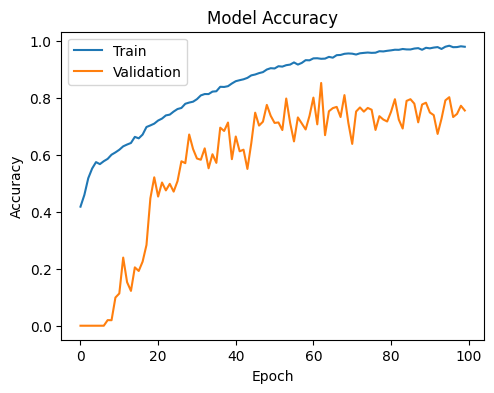

In [147]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [148]:
model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 64, 64, 3)         0         
                                                                 
 random_rotation_5 (RandomR  (None, 64, 64, 3)         0         
 otation)                                                        
                                                                 
 random_zoom_5 (RandomZoom)  (None, 64, 64, 3)         0         
                                                                 
 conv2d_91 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_92 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                

In [149]:
# Code showing the accmodel_loaded.evaluate(x_train, y_train)
model_loaded = tf.keras.models.load_model('best_model.tf')

In [150]:
model_loaded.evaluate(x_train, y_train)


469/469 [==============================] - 6s 13ms/step - loss: 0.1839 - accuracy: 0.9367


[0.18389789760112762, 0.9366666674613953]

In [151]:
model_loaded.predict(x_train)[10000]

469/469 [==============================] - 6s 12ms/step


array([0.0027256, 0.0051627, 0.9921117], dtype=float32)

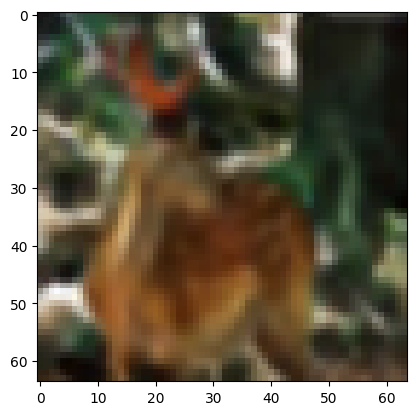

In [152]:
plt.imshow(x_train[10000])

In [153]:
y_train[10000]

2

# Object Detection

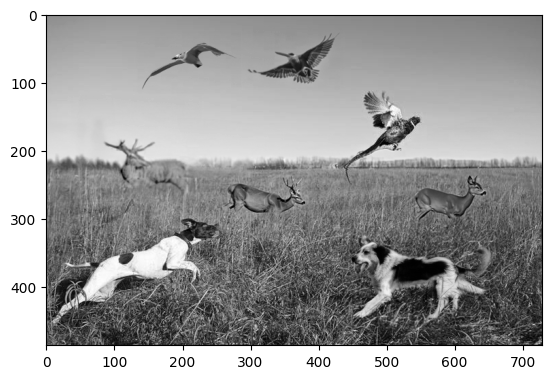

In [154]:
#load imaage as grey scale
img = cv2.imread('dog_bird_deer.jpg')

#convert bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#show image
plt.imshow(gray, cmap='gray')

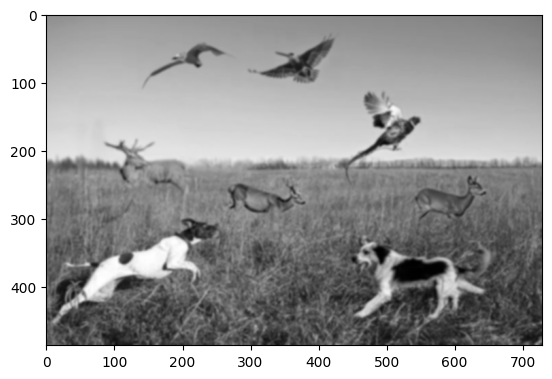

In [155]:
#apply gaussian blur
img_blur = cv2.GaussianBlur(gray, (7,7), 0)
#show image
plt.imshow(img_blur, cmap='gray')

1771.47


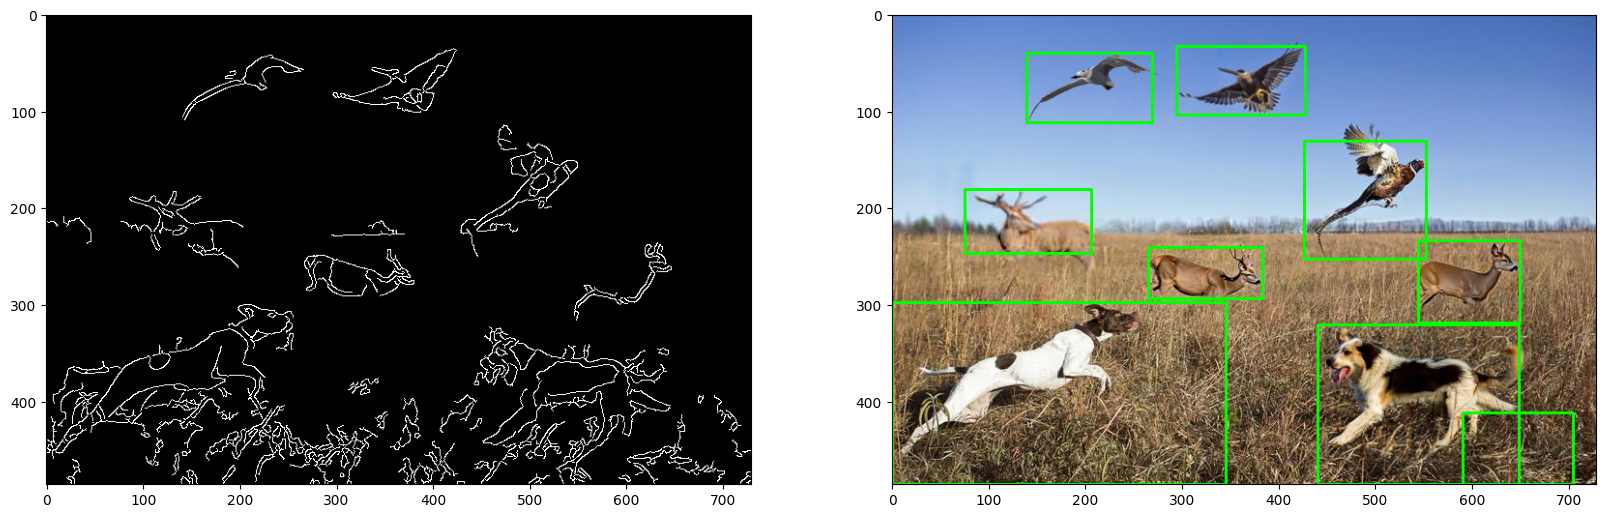

In [156]:
# Apply Canny edge detection
canny_edges = cv2.Canny(img_blur, 55, 200)

# Increase the kernel size for dilating the edges to close gaps in contours
kernel = np.ones((5, 5), np.uint8)
dilated_edges = cv2.dilate(canny_edges, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


min_area_threshold = 0.005 * img.shape[0] * img.shape[1]
print(min_area_threshold)

# Draw bounding boxes based on the area threshold
for c in contours:
    if cv2.contourArea(c) > min_area_threshold:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(canny_edges, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow( img)
plt.show()

# Classification of Detected Objects

1/1 [==============================] - 0s 13ms/step
Image 1: [0.4982222  0.48613703 0.01564075]
Image 2: [0.00107709 0.00677045 0.9921524 ]
Image 3: [2.8737998e-06 9.9999321e-01 3.9593174e-06]
Image 4: [0.9014408  0.01716895 0.08139034]
Image 5: [0.01429188 0.4252731  0.56043506]
Image 6: [0.02116001 0.78584343 0.19299655]
Image 7: [0.8781084  0.09292625 0.0289653 ]
Image 8: [0.24997985 0.00481134 0.7452088 ]
Image 9: [0.02390138 0.01658646 0.9595122 ]
[0 2 1 0 2 1 0 2 2]


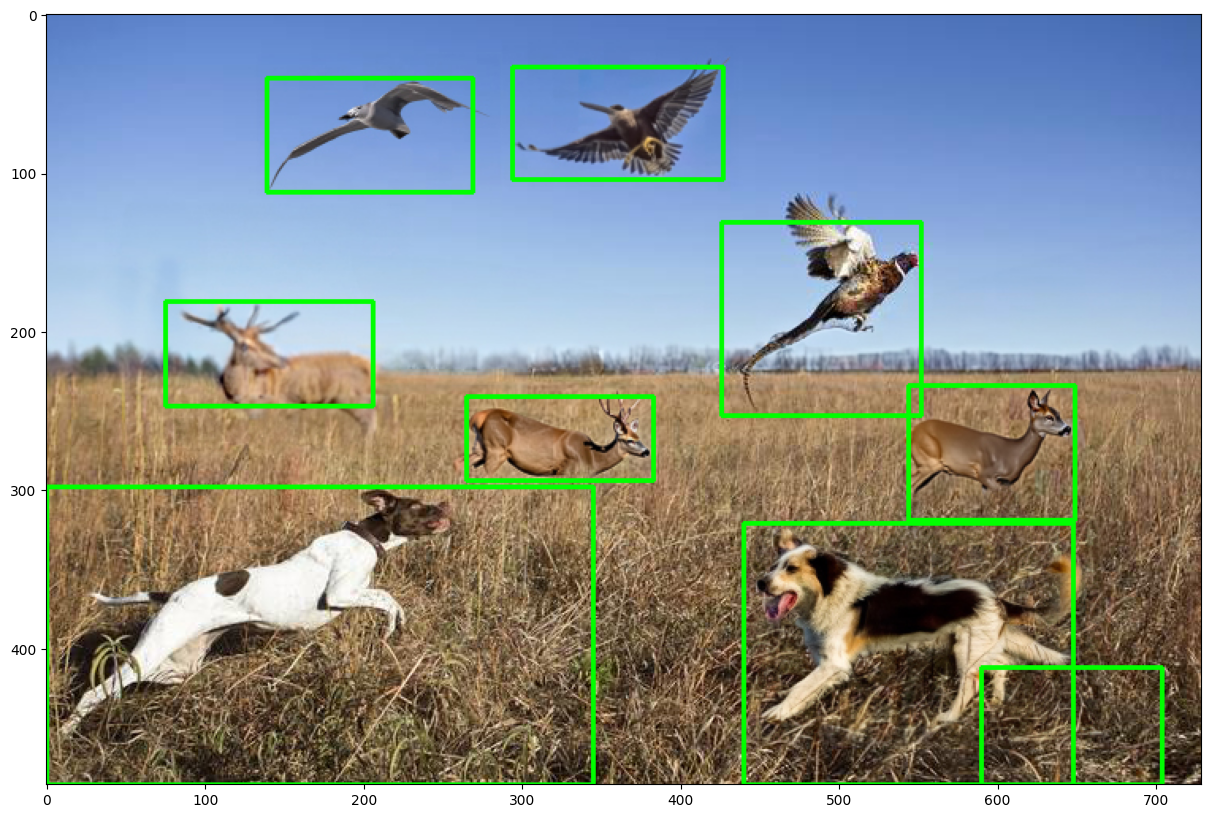

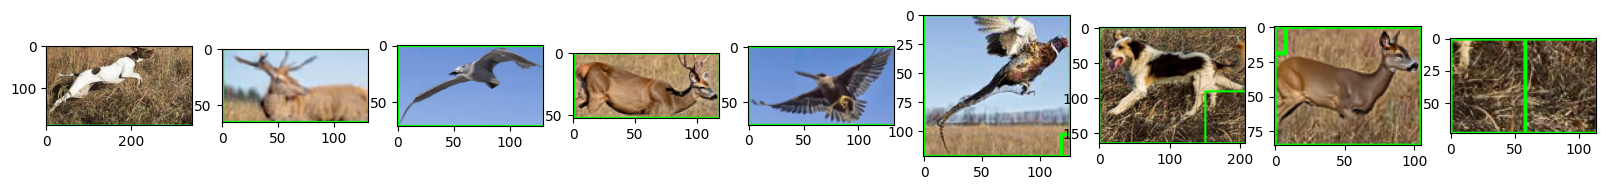

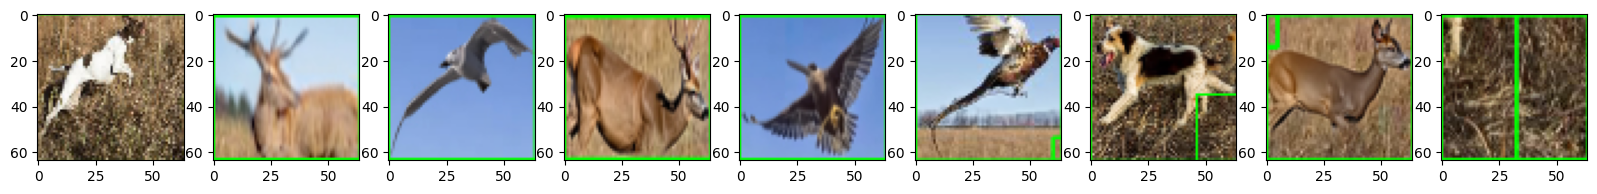

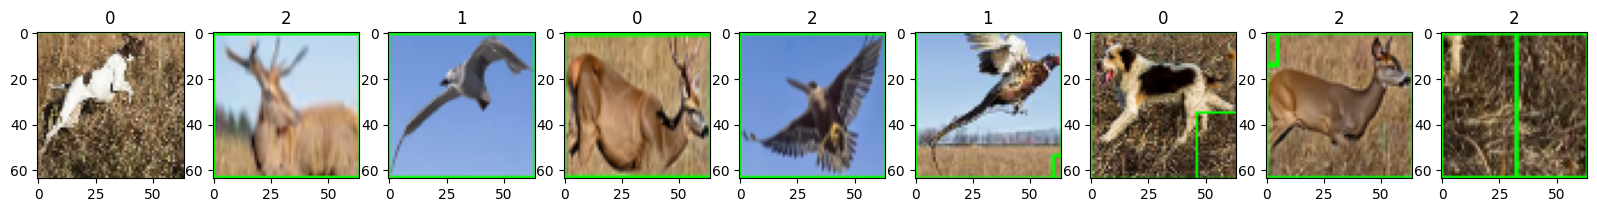

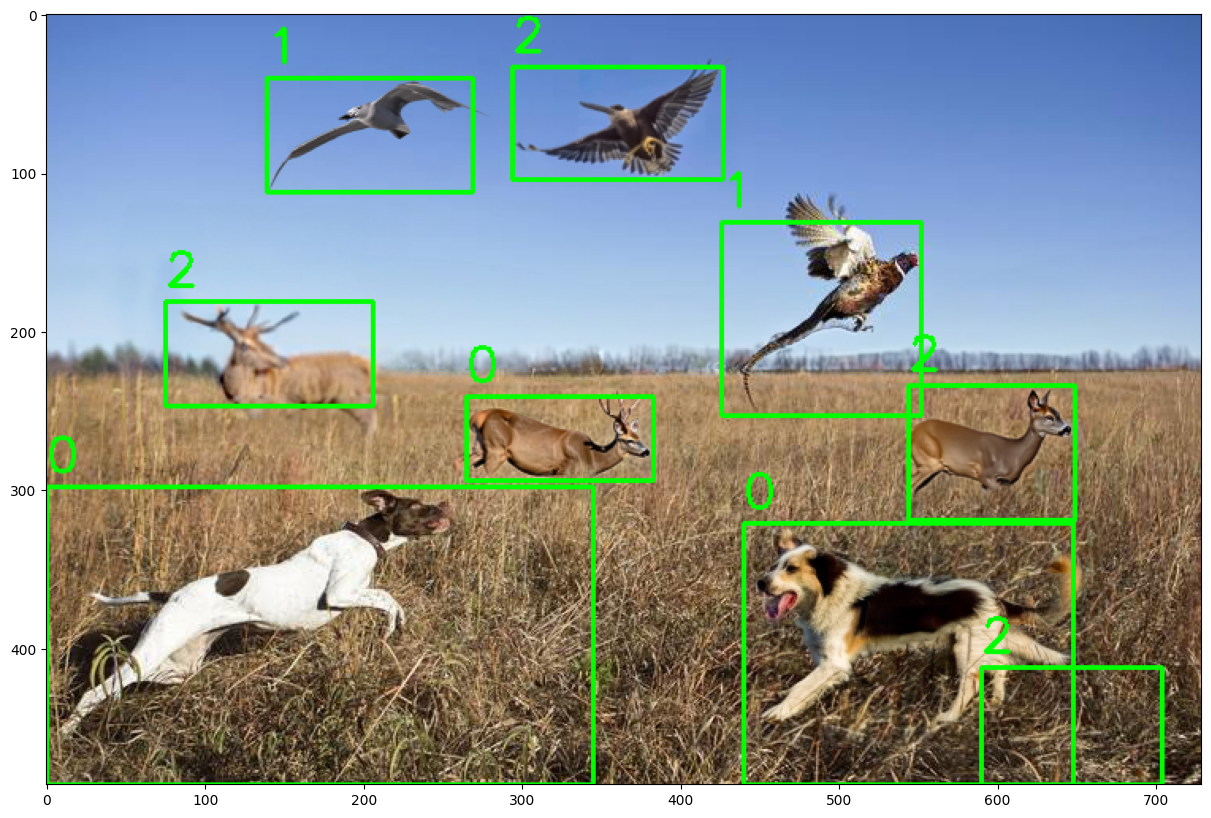

In [157]:
#make all the bounding boxes 64x64 so we can feed them into our model for prediction

#store the bounding boxes in a list
bounding_boxes = []

for c in contours:
    if cv2.contourArea(c) > min_area_threshold:
        x, y, w, h = cv2.boundingRect(c)
        bounding_boxes.append((x, y, w, h))
        
#sort the bounding boxes by their x coordinate
bounding_boxes.sort(key=lambda x: x[0])

#show the bounding boxes
for box in bounding_boxes:
    x, y, w, h = box
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(img)

#crop all the images inside the boxes as 64x64 images
cropped_images = []

for box in bounding_boxes:
    x, y, w, h = box
    cropped = img[y:y+h, x:x+w]
    cropped_images.append(cropped)
    
#show the cropped images
plt.figure(figsize=(20, 10))
for i in range(len(cropped_images)):
    plt.subplot(1, len(cropped_images), i + 1)
    plt.imshow(cropped_images[i])
    
#resize the images to 64x64
resized_images = []

for image in cropped_images:
    resized = cv2.resize(image, (64, 64))
    resized_images.append(resized)
    
#show the resized images
plt.figure(figsize=(20, 10))
for i in range(len(resized_images)):
    plt.subplot(1, len(resized_images), i + 1)
    plt.imshow(resized_images[i])
    
#convert the images to numpy arrays
resized_images = np.array(resized_images)

#normalize the images
resized_images = resized_images.astype('float32') / 255.0

#make predictions on the images
predictions = model_loaded.predict(resized_images)

#show the predictions
for i in range(len(predictions)):
    print(f"Image {i + 1}: {predictions[i]}")
    

# label the images
labels = np.argmax(predictions, axis=1)
print(labels)

#show the images with their labels
plt.figure(figsize=(20, 10))
for i in range(len(resized_images)):
    plt.subplot(1, len(resized_images), i + 1)
    plt.title(labels[i])
    plt.imshow(resized_images[i])
    

#show the labels on the original image with bounding boxes
for i in range(len(labels)):
    x, y, w, h = bounding_boxes[i]
    cv2.putText(img, str(labels[i]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.show()


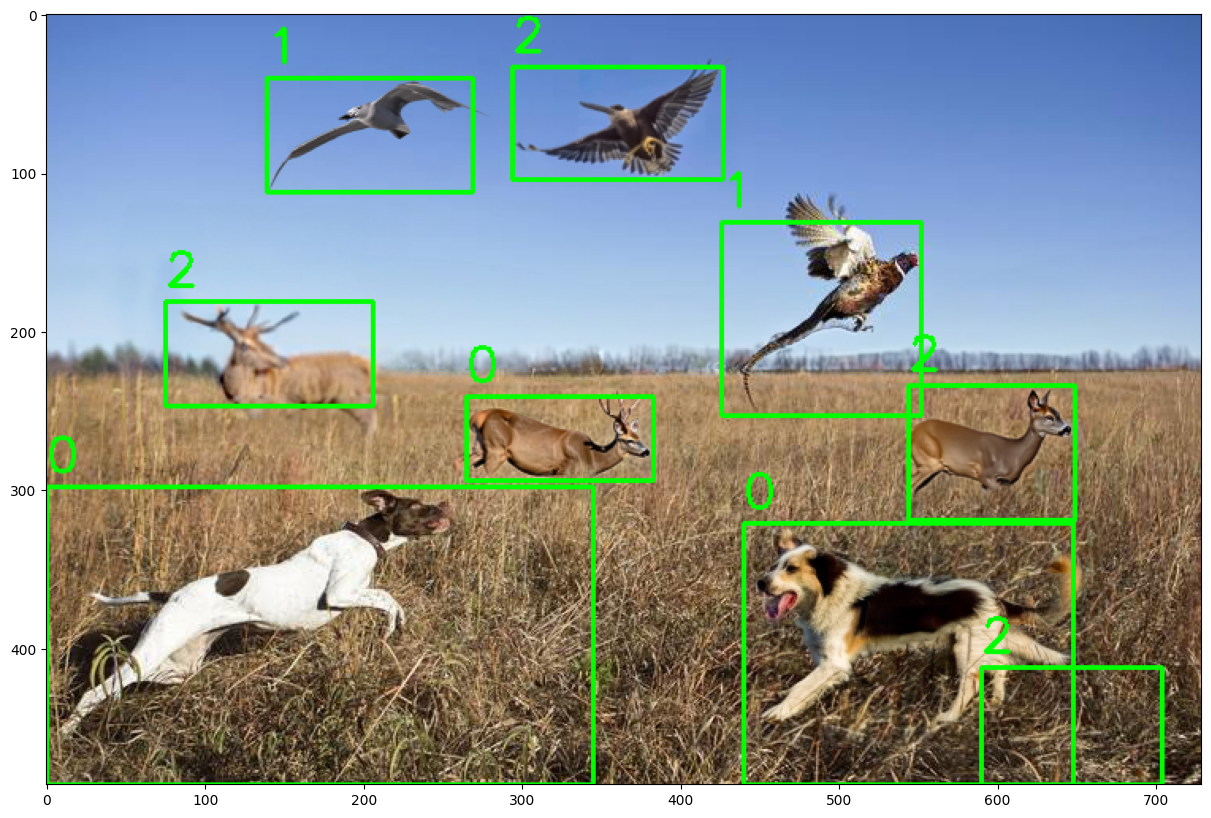

In [158]:
# Render a final image showing the result of your object detector with bounding boxes and labels on the original image.

# Text properties
text = "image label"
position = (50, 50)  # x, y coordinates
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
color = (255, 255, 255)  # White color in BGR
thickness = 2

# Put the text on the image
# cv2.putText(image, text, position, font, font_scale, color, thickness)

final_image = img.copy()

for i in range(len(labels)):
    x, y, w, h = bounding_boxes[i]
    cv2.putText(final_image, str(labels[i]), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(final_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plt.figure(figsize=(20, 10))
plt.imshow(final_image)
plt.show()

